In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from cartopy.io import shapereader
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union


reader = shapereader.Reader(
    shapereader.natural_earth(
        resolution="50m", category="cultural", name="admin_0_countries"
    )
)
shapes = [s for s in reader.records()]

In [3]:
na_shapes = [s for s in shapes if s.attributes["CONTINENT"] == "North America"]
sa_shapes = [s for s in shapes if s.attributes["CONTINENT"] == "South America"]
print(len(na_shapes), len(sa_shapes))

38 13


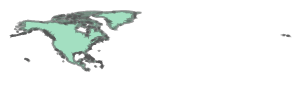

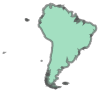

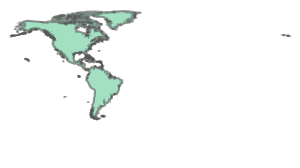

In [4]:
na_geometry = unary_union([s.geometry for s in na_shapes])
sa_geometry = unary_union([s.geometry for s in sa_shapes])
americas_geometry = unary_union([na_geometry, sa_geometry])
display(na_geometry)
display(sa_geometry)
display(americas_geometry)

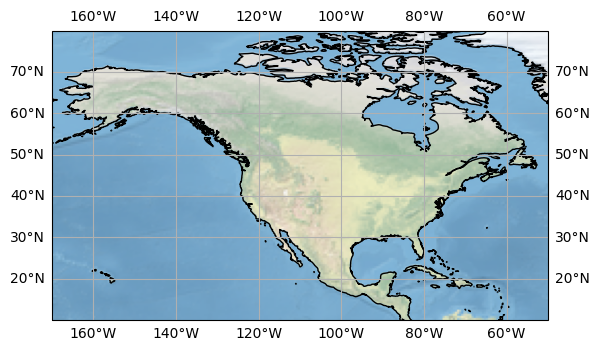

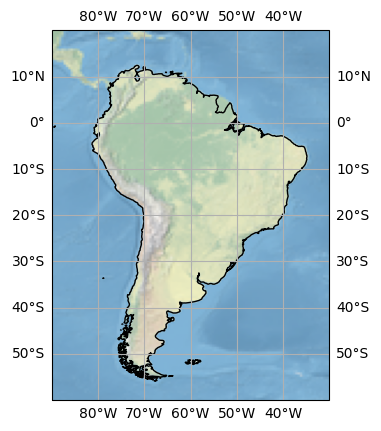

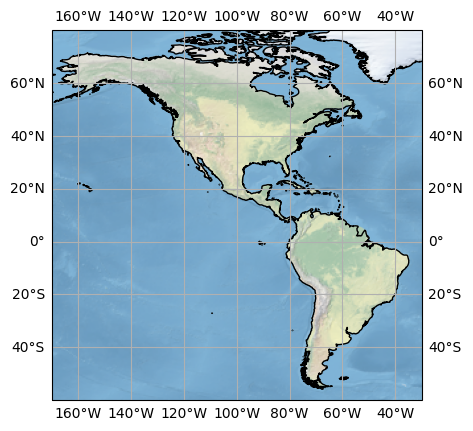

In [5]:
import matplotlib.pyplot as plt
from birdcall_distribution.plot import plot_geometry

NA_EXTENT = (-170, -50, 10, 80)
SA_EXTENT = (-90, -30, -60, 20)
AMERICAS_EXTENT = (-170, -30, -60, 80)

plot_geometry(na_geometry, NA_EXTENT)
plt.show()
plot_geometry(sa_geometry, SA_EXTENT)
plt.show()
plot_geometry(americas_geometry, AMERICAS_EXTENT)
plt.show()